In [28]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy.random as nr

El objetivo de este análisis es determinar el tiempo de vida media del isótopo de talio (Tl),  Utilizando el método de mínimos cuadrados, ajustamos un modelo exponencial a los datos del número de átomos de talio restantes en función del tiempo, para estimar el tiempo de vida media del isótopo.

In [21]:
NTl = 100000 #Numero de atomos de Tl
NPb = 0 #Numero de atomos de Pb
h = 1  # intervalo de tiempo
tau = 3.053*60  #tiempo de vida media
p = 1 - 2**(-h/tau) #probabilidad de decaimiento

NTalios = [NTl]
tmax = 1000 
startTime = time.process_time()
for _ in range(1,tmax,h):
    
    decays = 0 #Cuenta el número de ´átomos que decayeron en el tiempo t
    for i in range(NTl):
        r = nr.random()
        if r < p: #Moneda sesgada           
            decays += 1
#    actual = nr.random(NTl) #Utilizando nimpu
#    decay = actual[actual<p].size

    NTl -= decays
    NPb += decays
    NTalios.append(NTl)
    
endTime = time.process_time()
print('tiempo = ',round(endTime-startTime,2),' s')
tpoints = np.arange(0,tmax,h)

tiempo =  6.58  s


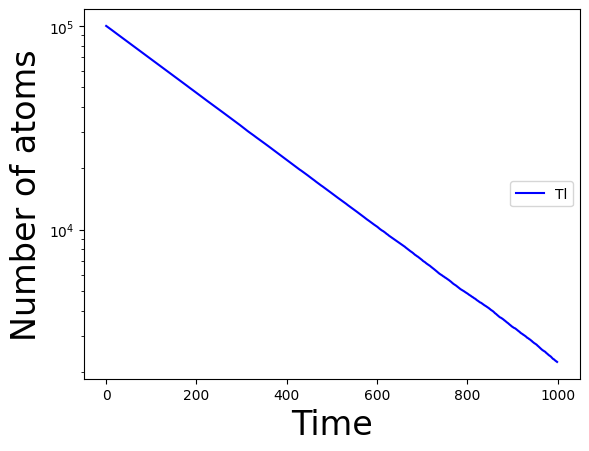

In [22]:
plt.semilogy(tpoints,NTalios,color = "blue",label = "Tl")
plt.xlabel("Time",fontsize = 24)
plt.ylabel("Number of atoms",fontsize = 24)
plt.legend(loc = 'center right')
plt.show()

Transformando a NTalios a escala logaritmica

Tiempo de vida media estimado: 183.08077819963825 segundos


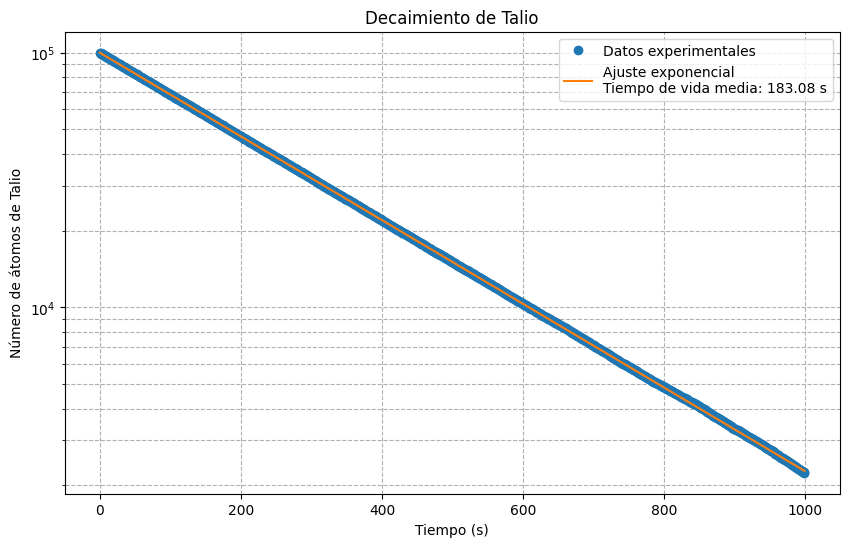

In [30]:
# Función para el modelo de decaimiento exponencial
def exp_decay(t, N0, lambda_val):
    return N0 * np.exp(-lambda_val * t)

# Datos simulados: tpoints y NTalios
tpoints = np.arange(0, tmax, h)
NTalios = np.array(NTalios)  # Asumiendo que esta variable ya contiene los datos de N(t)

# Ajuste exponencial a los datos
popt, pcov = curve_fit(exp_decay, tpoints, NTalios, p0=[NTl, 1/tau])

# Extraer los parámetros del ajuste
N0_est, lambda_est = popt

# Calcular el tiempo de vida media a partir de la constante de decaimiento ajustada
tau_est = np.log(2) / lambda_est

print(f"Tiempo de vida media estimado: {tau_est} segundos")

# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.semilogy(tpoints, NTalios, 'o', label='Datos experimentales')
plt.semilogy(tpoints, exp_decay(tpoints, *popt), '-', label=f'Ajuste exponencial\nTiempo de vida media: {tau_est:.2f} s')

plt.xlabel('Tiempo (s)')
plt.ylabel('Número de átomos de Talio')
plt.title('Decaimiento de Talio')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [33]:
teorico = 183.18
print("Error porcentual: " + str(abs(teorico-tau_est)/teorico*100) + " %")

Error porcentual: 0.05416628472636798 %


El análisis realizado estimó el tiempo de vida media del isótopo de talio mediante una simulación de decaimiento radioactivo, ajustando un modelo exponencial a los datos simulados. La precisión del modelo se evidenció en el ajuste a los datos, con un error porcentual en el tiempo de vida media estimado de solo el 0.054%, destacando la exactitud de la simulación para predecir la dinámica de decaimiento del talio.

Este bajo error porcentual subraya la eficacia del método de mínimos cuadrados en la modelación de procesos exponenciales y refuerza la validez del enfoque teórico utilizado para describir el comportamiento del decaimiento radioactivo.